# Demo of PyMC models

In [1]:
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm

In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [3]:
%load_ext autoreload
%autoreload 2

In [25]:
export_images = False

## Synthetic Control

In [5]:
from causal_impact.simulate_data import generate_synthetic_control_data

treatment_time = 70
data, weightings_true = generate_synthetic_control_data(treatment_time=treatment_time)
data.head()

,a,b,c,d,e,f,g,counterfactual,causal effect,actual
0,-1.477498,-1.251863,1.163492,0.445860,-0.943446,0.735915,2.402804,1.488344,-0.0,1.632995
1,-2.215387,-1.119840,1.325837,0.786653,-1.271164,0.718571,2.276620,1.552327,-0.0,1.111087
2,-1.469898,0.445886,0.643807,1.361380,-0.945053,1.094402,2.592471,1.607663,-0.0,1.545547
3,-1.125415,0.605340,0.634412,1.560901,-0.663363,0.585567,2.546841,1.653782,-0.0,1.548785
4,-1.006497,1.369047,0.080484,1.671438,-1.292054,1.133097,2.461603,1.690993,-0.0,1.767231


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


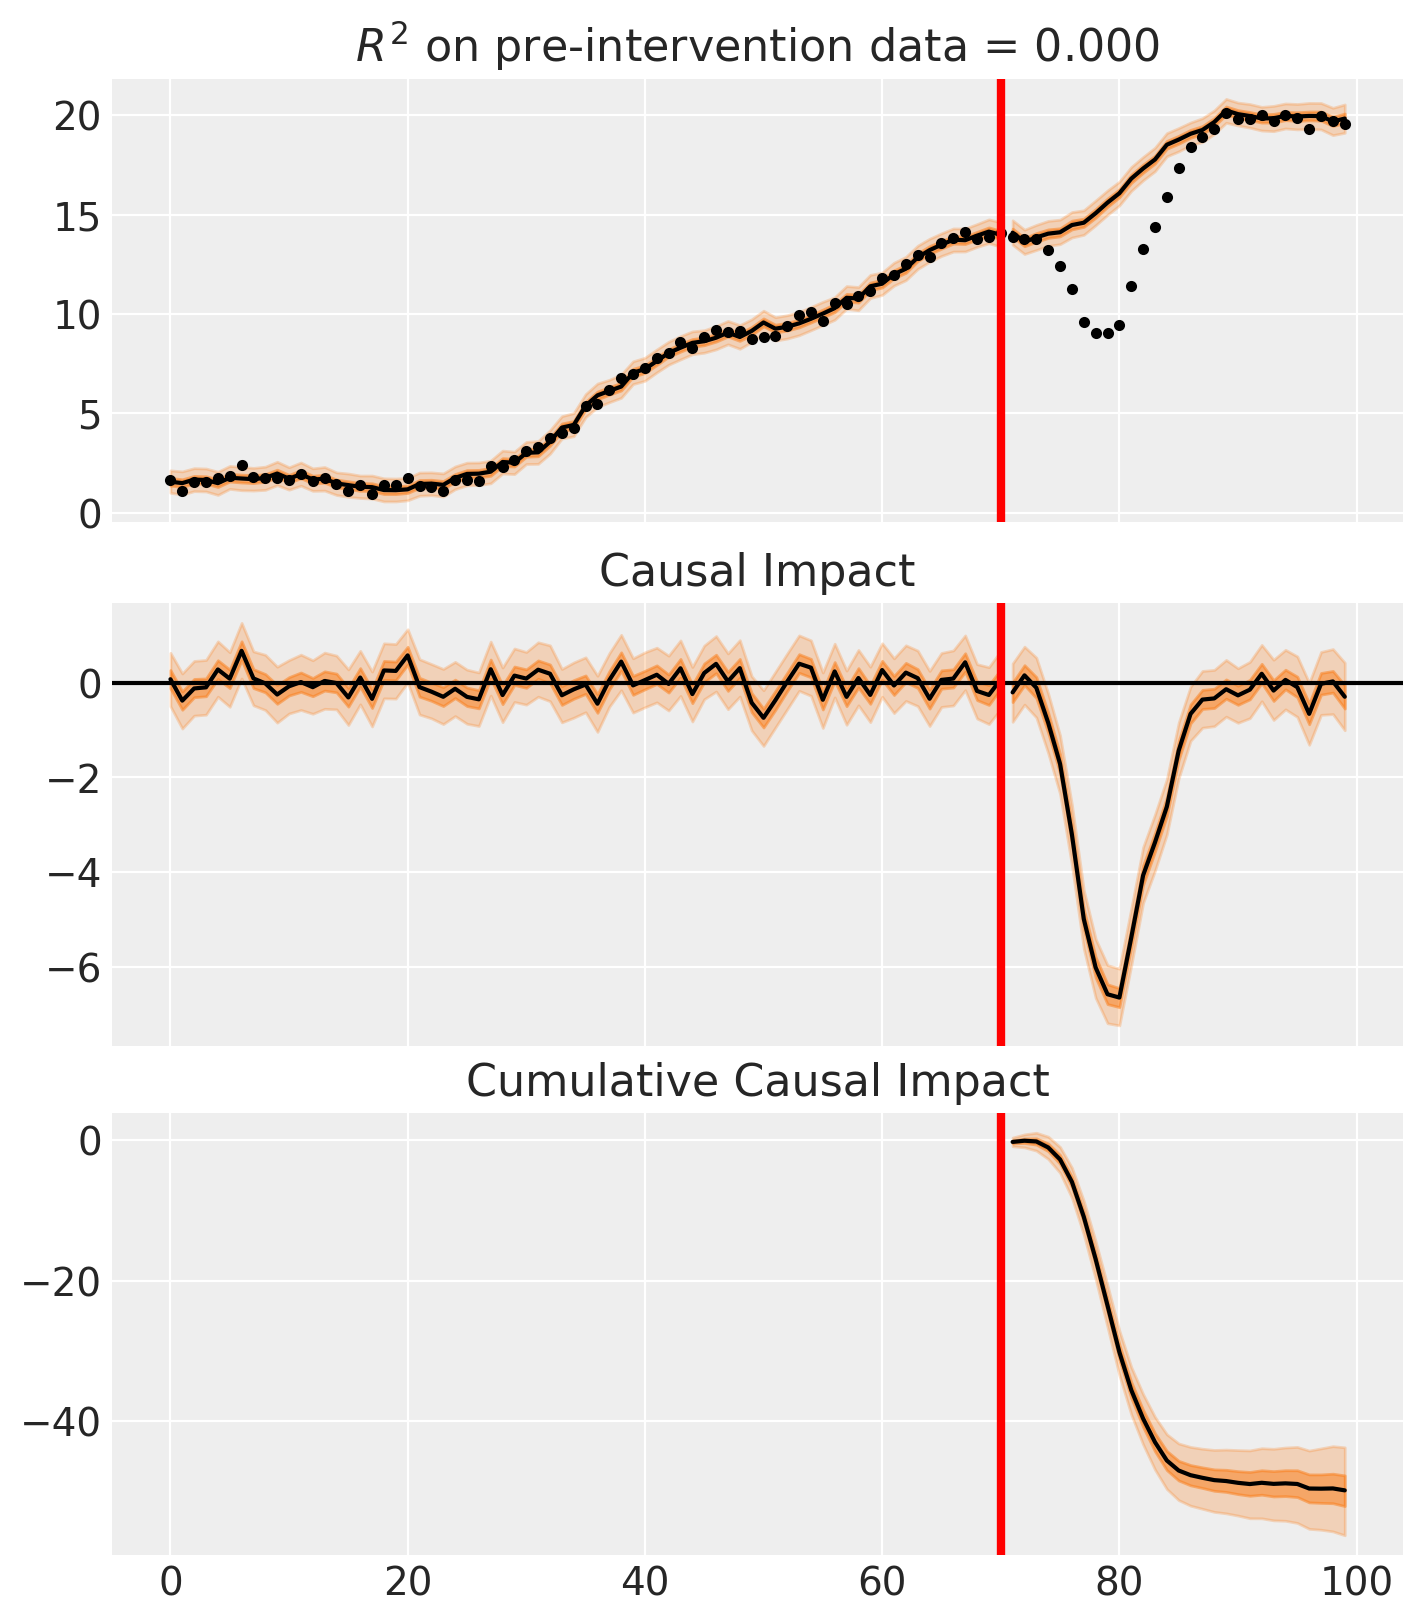

In [6]:
from causal_impact.pymc_experiments import SyntheticControl
from causal_impact.pymc_models import WeightedSumFitter

# Note, we do not want an intercept in this model
thing = SyntheticControl(data,
                         treatment_time,
                         formula = "actual ~ 0 + a + b + c + d + e + f + g",
                         prediction_model=WeightedSumFitter())

thing.plot();

if export_images:
    plt.savefig('../img/synthetic_control_pymc.png', bbox_inches='tight', dpi=300, facecolor="white")

## Interrupted time series

In [7]:
# # Generate data
# from causal_impact.simulate_data import generate_time_series_data

# df = generate_time_series_data("2017-01-01")
# df = df.loc[:, ['month', 'year', 't', 'y']]
# df.to_csv("../causal_impact/data/its.csv")

In [8]:
# Load data
df = pd.read_csv('../causal_impact/data/its.csv', parse_dates=["date"])
df.set_index("date", inplace=True)
treatment_time = pd.to_datetime("2017-01-01")
df.head()

,month,year,t,y
date,,,,
2010-01-31,1,2010,0,25.058186
2010-02-28,2,2010,1,27.189812
2010-03-31,3,2010,2,26.487551
2010-04-30,4,2010,3,31.241716
2010-05-31,5,2010,4,40.753973


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.8812, but should be close to 0.8. Try to increase the number of tuning steps.


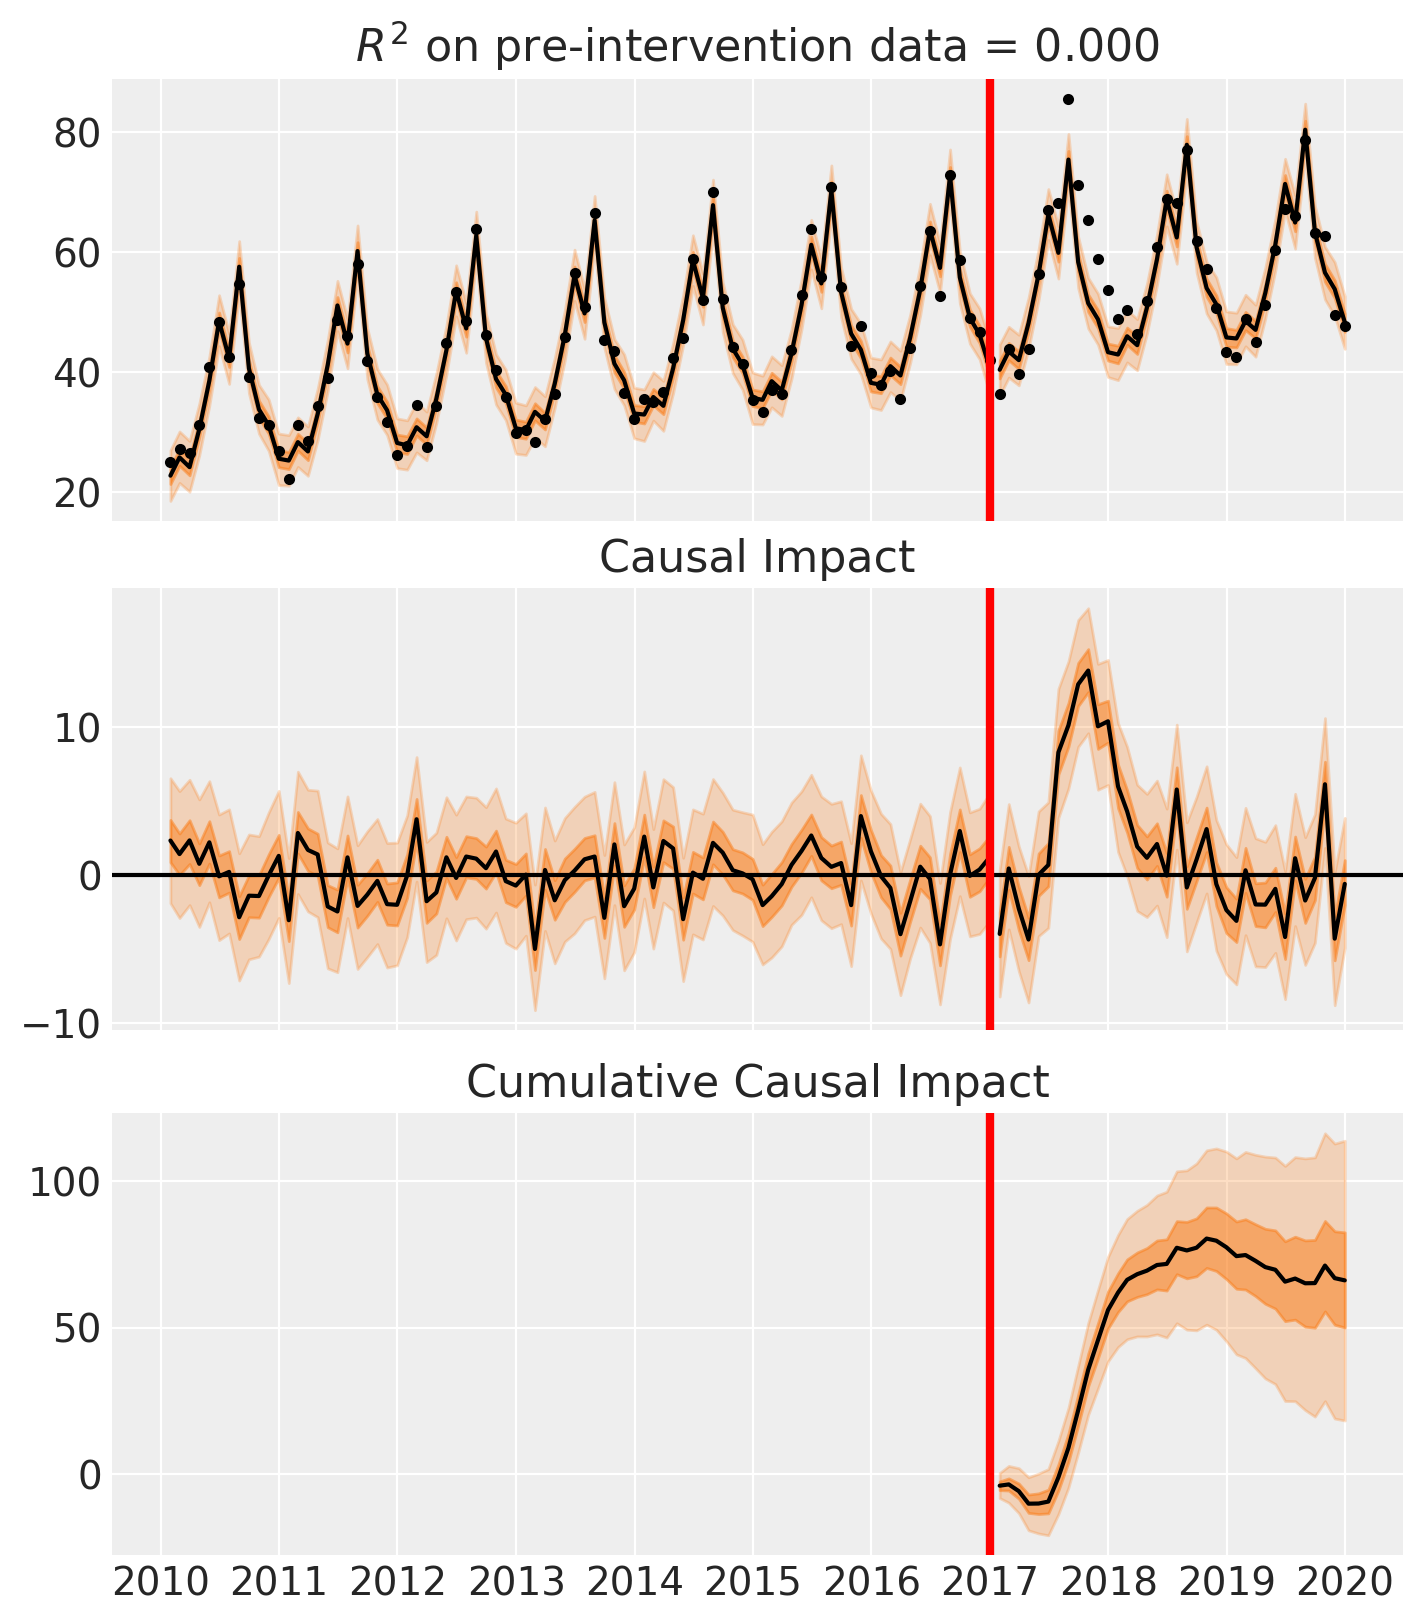

In [9]:
from causal_impact.pymc_experiments import InterruptedTimeSeries
from causal_impact.pymc_models import LinearRegression

thing = InterruptedTimeSeries(df, 
                              treatment_time, 
                              formula = 'y ~ 1 + t + C(month)', 
                              prediction_model=LinearRegression())

fig, ax = thing.plot()

if export_images:
    plt.savefig('../img/interrupted_time_series_pymc.png', bbox_inches='tight', dpi=300, facecolor="white")

## Difference in differences

## Regression discontinuity

In [10]:
# # Generate data
# from causal_impact.simulate_data import generate_regression_discontinuity_data
# df = generate_regression_discontinuity_data(true_treatment_threshold=0.5)
# df.to_csv('../causal_impact/data/regression_discontinuity.csv', index=False)

In [26]:
# Load data
data = pd.read_csv('../causal_impact/data/regression_discontinuity.csv')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


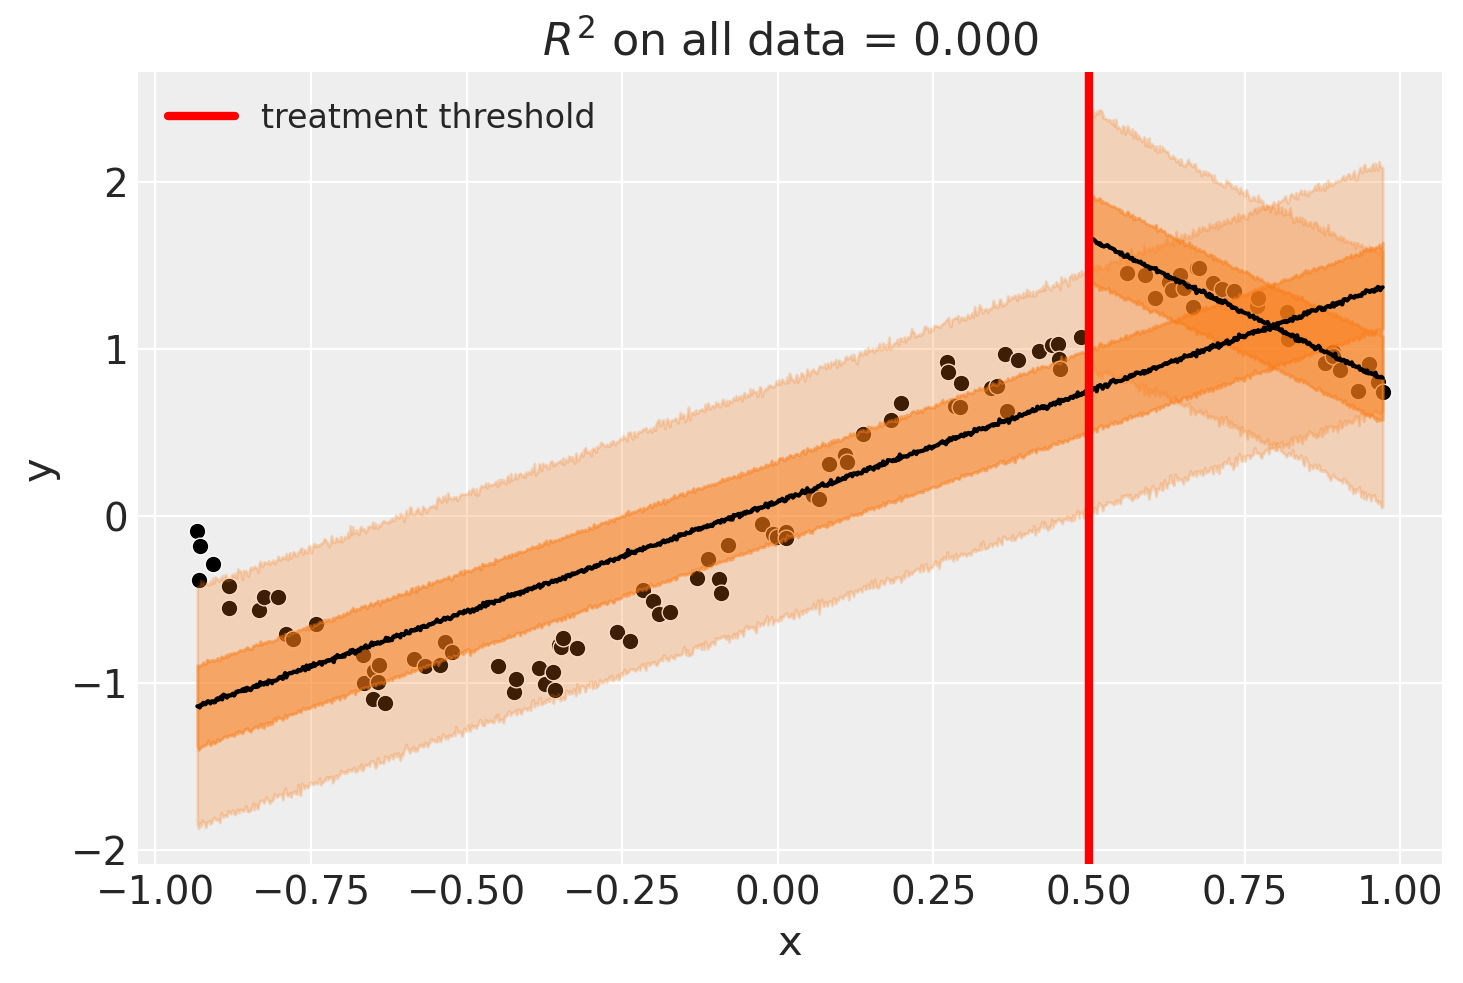

In [27]:
from causal_impact.pymc_experiments import RegressionDiscontinuity
from causal_impact.pymc_models import LinearRegression

thing = RegressionDiscontinuity(data, 
                                formula = 'y ~ 1 + x + treated + x:treated',
                                prediction_model=LinearRegression(), 
                                treatment_threshold=0.5)
thing.plot()

if export_images:
    plt.savefig('../img/regression_discontinuity_pymc.png', bbox_inches='tight', dpi=300, facecolor="white")

TODO: apply GP model OR use non-linear features (i.e. polynomial or sin basis functions) in linear regression approach